In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, Flatten, Dense
import numpy as np

In [4]:
%load_ext autoreload
%autoreload 2
%aimport data
%reload_ext data
import data, train
from config import patch_data_path
import preprocessing
import os
import net
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
records = pd.read_csv(os.path.join(patch_data_path,"records.csv"))

In [11]:
import pandas as pd
import os
import numpy as np
import config, preprocessing
records = pd.read_csv(os.path.join(config.patch_data_path,"records.csv"))
names = list(records[records["positiv"]]["filepath"])
names = [name.split("/")[-1]+".npy" for name in names]
adg = preprocessing.AneurysmDataGenerator(config.patch_data_path,names)

100%|██████████| 428/428 [00:00<00:00, 1732.71it/s]


In [17]:
print(total_mean,total_std)


-5.8638827e-09 0.9999929070690179


In [15]:
total_mean = 0
total_std = 1
for image in adg.images:
    total_mean = np.mean(image)
    total_std *= np.std(image)

In [21]:
total_mean = 0
total_std = 1
for mask in adg.masks:
    total_mean = np.mean(mask)
    total_std *= np.std(mask)
print(total_mean, total_std)


0.0019542552806712963 0.0


In [9]:
x = adg.images#[image for i, image in enumerate(adg.images) if np.mean(adg.masks[i])>0.01]
x = np.array(x)
x = x.reshape(*x.shape,1)
y = adg.images#[mask for i, image in enumerate(adg.masks) if np.mean(adg.masks[i])>0.01]
y = np.array(y)
y = y.reshape(*y.shape,1)

In [24]:
model.fit(x,y,batch_size=20,epochs=10,validation_split=0.05)

Train on 410 samples, validate on 22 samples
Epoch 1/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8268 - acc: 0.0000e+00 - val_loss: 8.7340 - val_acc: 0.0000e+00
Epoch 2/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8278 - acc: 0.0000e+00 - val_loss: 8.4272 - val_acc: 0.0000e+00
Epoch 3/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.8341 - acc: 0.0000e+00 - val_loss: 8.4226 - val_acc: 0.0000e+00
Epoch 4/10
410/410 [==============================] - 5s 13ms/sample - loss: 9.7884 - acc: 0.0000e+00 - val_loss: 8.4405 - val_acc: 0.0000e+00
Epoch 5/10
410/410 [==============================] - 6s 13ms/sample - loss: 9.8166 - acc: 0.0000e+00 - val_loss: 8.4707 - val_acc: 0.0000e+00
Epoch 6/10
410/410 [==============================] - 6s 13ms/sample - loss: 9.8039 - acc: 0.0000e+00 - val_loss: 8.4169 - val_acc: 0.0000e+00
Epoch 7/10
410/410 [==============================] - 6s 14ms/sample - loss: 9.7908 - acc: 0.0000

In [11]:
np.mean([np.mean(mask) for mask in adg.masks])

0.015873408564814815

In [12]:
x.shape

(432, 40, 40, 40, 1)

In [26]:
np.mean(adg.masks)

0.015873408564814815

In [25]:
result = model.predict(x).reshape((-1,40,40,40))
np.mean(result)

0.10892415

In [14]:
result = model.predict(x).reshape((-1,40,40,40))

In [27]:
result = model.predict(x[431:]).reshape((40,40,40))
print(np.max(result), np.mean(result))

1.0 0.031777874


<Figure size 16000x16000 with 0 Axes>

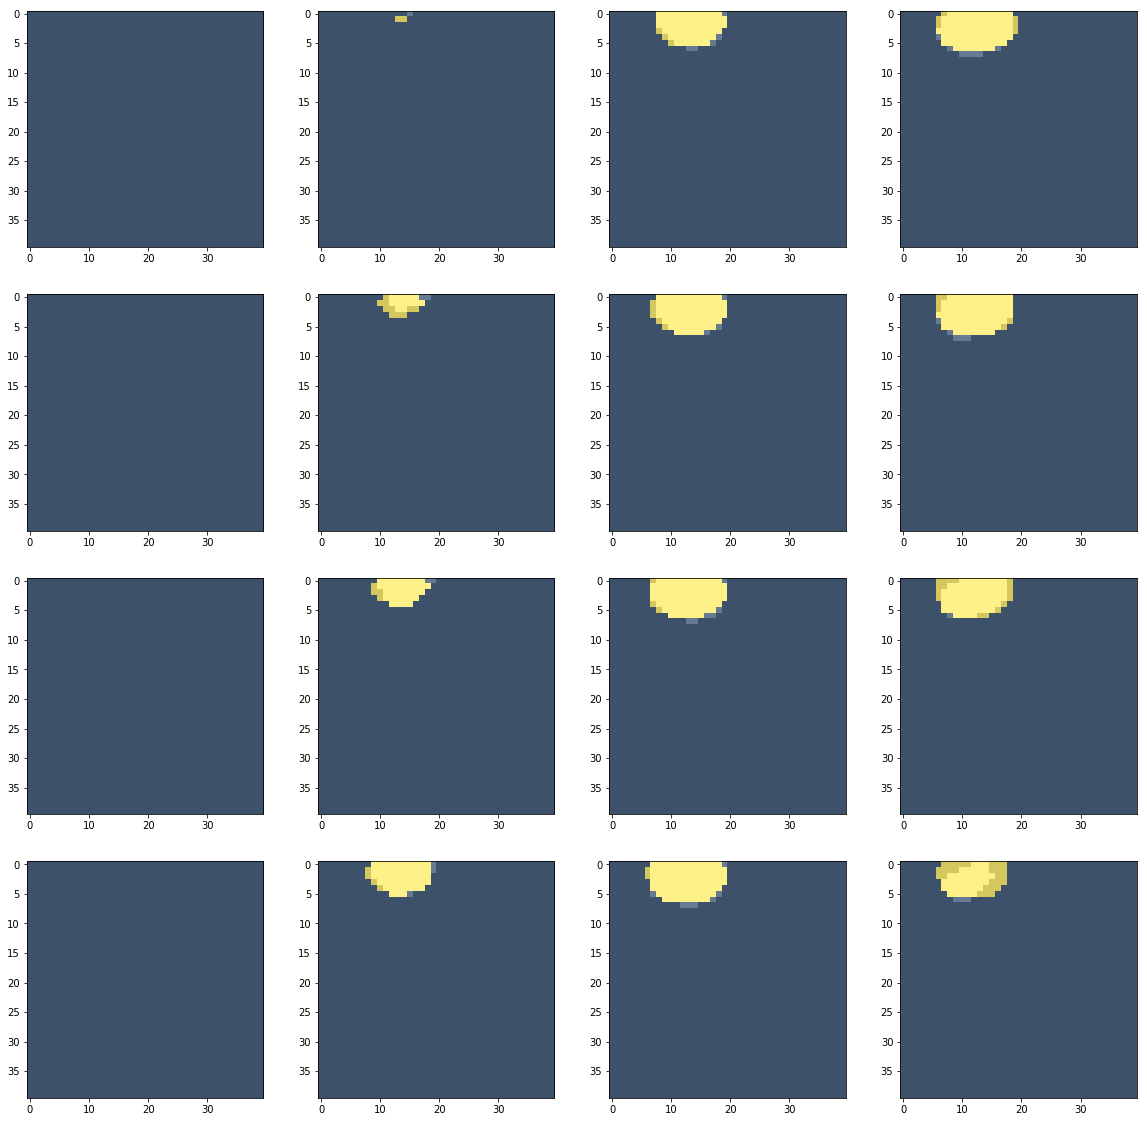

In [35]:
import matplotlib.pyplot as plt
N=4
image = adg.masks[-1]
mask = result >0.98
plt.figure(dpi=800)
plt.rcParams['figure.figsize'] = [20,20]
fig, ax = plt.subplots(nrows=N, ncols=N)
for i in range(N):
    for j in range(N):
        im = image[i+j*N+16,:,:]
        m = mask[i+j*N+16,:,:]
        ax[i,j].imshow(im,alpha=0.4,cmap="Greys_r",vmin=0,vmax=1)
        ax[i,j].imshow(m,alpha=0.6, cmap="cividis",vmin=0,vmax=1)


In [18]:
np.mean(result)

0.036762107

In [37]:
import config

In [36]:
adg.names[237]

'A095-1x2x3.npy'

In [44]:
image = np.load(os.path.join(config.full_data_path,"image","A095.dcm.npy"))
image = image.reshape(1,*image.shape,1)
image.shape

(1, 220, 256, 256, 1)

In [18]:
trainer = train.Trainer()

In [ ]:
trainer.train(epochs=20,optimizer="adam", loss="mean_squared_error")

In [ ]:
val = trainer.history.history

In [ ]:
trainer.train(epochs=20,optimizer="sgd", loss="mean_squared_error")

In [ ]:
sgdhistory = trainer.history.history

In [ ]:
from matplotlib import pyplot as plt


In [ ]:
plt.plot(sgdhistory["loss"], label="sgd")
plt.plot(val["loss"], label="adam")
plt.legend()

In [ ]:
plt.title("Mean Absolute Error")
plt.plot(sgdhistory["val_mean_absolute_error"], label="sgd")
plt.plot(val["val_mean_absolute_error"], label="adam")
plt.legend()

In [4]:
import data, train, net
trainer = train.Trainer()
trainer.train(epochs=5,optimizer="adam", loss=net.weighted_crossentropy(32))

ImportError: cannot import name 'model_to_dot' from 'keras.utils' (/home/bagel/.conda/envs/simon/lib/python3.7/site-packages/keras/utils/__init__.py)

In [3]:
%load_ext autoreload
%autoreload 2
%aimport data
%reload_ext data

In [6]:
y = trainer.y.reshape(*trainer.y.shape,1)

In [13]:
import numpy as np

In [16]:
np.mean(trainer.y)

0.29088137

In [12]:
np.mean(trainer.y[...,1])

0.016908303

In [32]:
import time, datetime, pandas as pd

In [30]:
trainer.history.history

{'loss': [1.4378013051716627,
  0.9099266776996376,
  0.6560740360116537,
  0.4736835252394718,
  0.37850110391072467],
 'mean_absolute_error': [0.5480548,
  0.36483356,
  0.18457153,
  0.14224647,
  0.112289846],
 'val_loss': [0.9638996720314026,
  0.7312051951885223,
  0.50823246439298,
  0.36769733329614,
  0.36757362137238186],
 'val_mean_absolute_error': [0.51118344,
  0.30274743,
  0.25468788,
  0.1352927,
  0.15275852]}

In [ ]:
keras.models.load_model(config.model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
